In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer, OneHotEncoder, Normalizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold,cross_val_score, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler

In [2]:
data = pd.read_csv('/content/drive/MyDrive/ML/ML Problems/FLIGHT FARE PREDICTION/Cleaned_dataset.csv')

In [3]:
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [4]:
data.isnull().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

# **EDA**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [6]:
data = data.drop('Flight_code', axis = 1)

In [7]:
data.head()

,Date_of_journey,Journey_day,Airline,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [8]:
data["Journey_day"] = pd.to_datetime(data.Date_of_journey, format = "%Y-%m-%d").dt.day

In [9]:
data["Journey_month"] = pd.to_datetime(data.Date_of_journey, format = "%Y-%m-%d").dt.month

In [10]:
data = data.drop("Date_of_journey", axis = 1)

In [11]:
data.head()

,Journey_day,Airline,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_month
0,16,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,1
1,16,Indigo,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,1
2,16,GO FIRST,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,1
3,16,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,1
4,16,Air India,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,1


In [12]:
categorical_columns = ['Airline', 'Class', 'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination', 'Journey_day']
data[categorical_columns] = data[categorical_columns].astype('category')
print(data[categorical_columns].dtypes)
print(data.dtypes)



Airline        category
Class          category
Source         category
Departure      category
Total_stops    category
Arrival        category
Destination    category
Journey_day    category
dtype: object
Journey_day          category
Airline              category
Class                category
Source               category
Departure            category
Total_stops          category
Arrival              category
Destination          category
Duration_in_hours     float64
Days_left               int64
Fare                    int64
Journey_month           int32
dtype: object


In [ ]:
# Display summary statistics
print(data.describe())

# Display the median values for numeric columns
print(data[['Duration_in_hours', 'Days_left', 'Fare']].median())

       Duration_in_hours      Days_left           Fare  Journey_month
count      452088.000000  452088.000000  452088.000000  452088.000000
mean           12.349222      25.627902   22840.100890       1.804730
std             7.431478      14.300846   20307.963002       0.629704
min             0.750000       1.000000    1307.000000       1.000000
25%             6.583300      13.000000    8762.750000       1.000000
50%            11.333300      26.000000   13407.000000       2.000000
75%            16.500000      38.000000   35587.000000       2.000000
max            43.583300      50.000000  143019.000000       3.000000
Duration_in_hours       11.3333
Days_left               26.0000
Fare                 13407.0000
dtype: float64


In [13]:
# Custom function for calculating IQR and identifying outliers
def iqr_outliers(df, column):
    '''
    Calculate IQR and identify outliers for a specific column

    Calculates the Interquartile Range (IQR) of the specified column in the DataFrame and identifies the number of outliers based on the IQR method.

    '''
    # Check if the column exists in the DataFrame
    if column not in df.columns:
        print(f"Column '{column}' does not exist in the DataFrame.")
        return None, None, None, None

    # Check if the DataFrame is empty
    if df.empty:
        print("DataFrame is empty.")
        return None, None, None, None

    # Calculate the IQR of the column
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    print(f"IQR: {iqr}")

    # Identify lower outliers below q1 - 1.5 * iqr and upper outliers above q3 + 1.5 * iqr
    lower_outliers = df[df[column] < q1 - 1.5 * iqr]
    upper_outliers = df[df[column] > q3 + 1.5 * iqr]

    # Calculate the number of lower outliers and upper outliers
    num_lower_outliers = len(lower_outliers)
    num_upper_outliers = len(upper_outliers)
    num_total_outliers = num_lower_outliers + num_upper_outliers
    print(f"Number of lower outliers: {num_lower_outliers}")
    print(f"Number of upper outliers: {num_upper_outliers}")
    print(f"Total number of outliers: {num_total_outliers}")

    # Calculate proportion of outliers in the dataset
    proportion_outliers = num_total_outliers / len(df) * 100
    print(f"Proportion of outliers in the dataset: {proportion_outliers:.2f}%")

    return lower_outliers, upper_outliers, num_total_outliers

In [14]:
iqr_outliers(data, 'Fare')




IQR: 26824.25
Number of lower outliers: 0
Number of upper outliers: 9245
Total number of outliers: 9245
Proportion of outliers in the dataset: 2.04%


(Empty DataFrame
 Columns: [Journey_day, Airline, Class, Source, Departure, Total_stops, Arrival, Destination, Duration_in_hours, Days_left, Fare, Journey_month]
 Index: [],
        Journey_day  Airline     Class     Source     Departure Total_stops  \
 356             16  Vistara  Business      Delhi    After 6 PM      1-stop   
 357             16  Vistara  Business      Delhi  6 AM - 12 PM      1-stop   
 358             16  Vistara  Business      Delhi   Before 6 AM      1-stop   
 359             16  Vistara  Business      Delhi    After 6 PM      1-stop   
 360             16  Vistara  Business      Delhi  12 PM - 6 PM      1-stop   
 ...            ...      ...       ...        ...           ...         ...   
 451502           2  Vistara  Business  Ahmedabad   Before 6 AM      1-stop   
 451503           2  Vistara  Business  Ahmedabad  6 AM - 12 PM      1-stop   
 451607           3  Vistara  Business  Ahmedabad  6 AM - 12 PM      1-stop   
 451608           3  Vistara  Busine

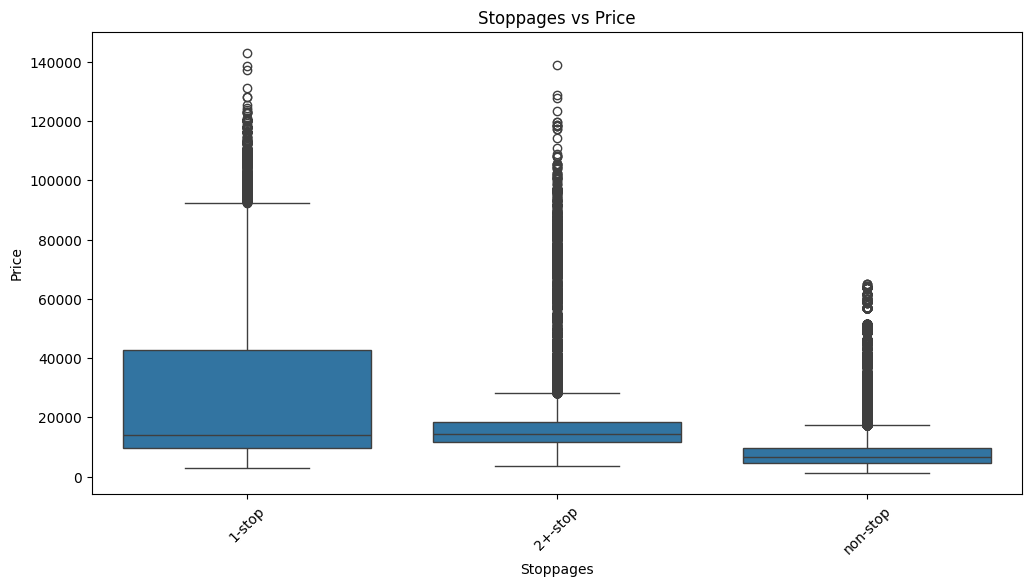

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'data' and has 'stoppages' and 'price' columns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Total_stops', y='Fare', data=data)
plt.title('Stoppages vs Price')
plt.xlabel('Stoppages')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


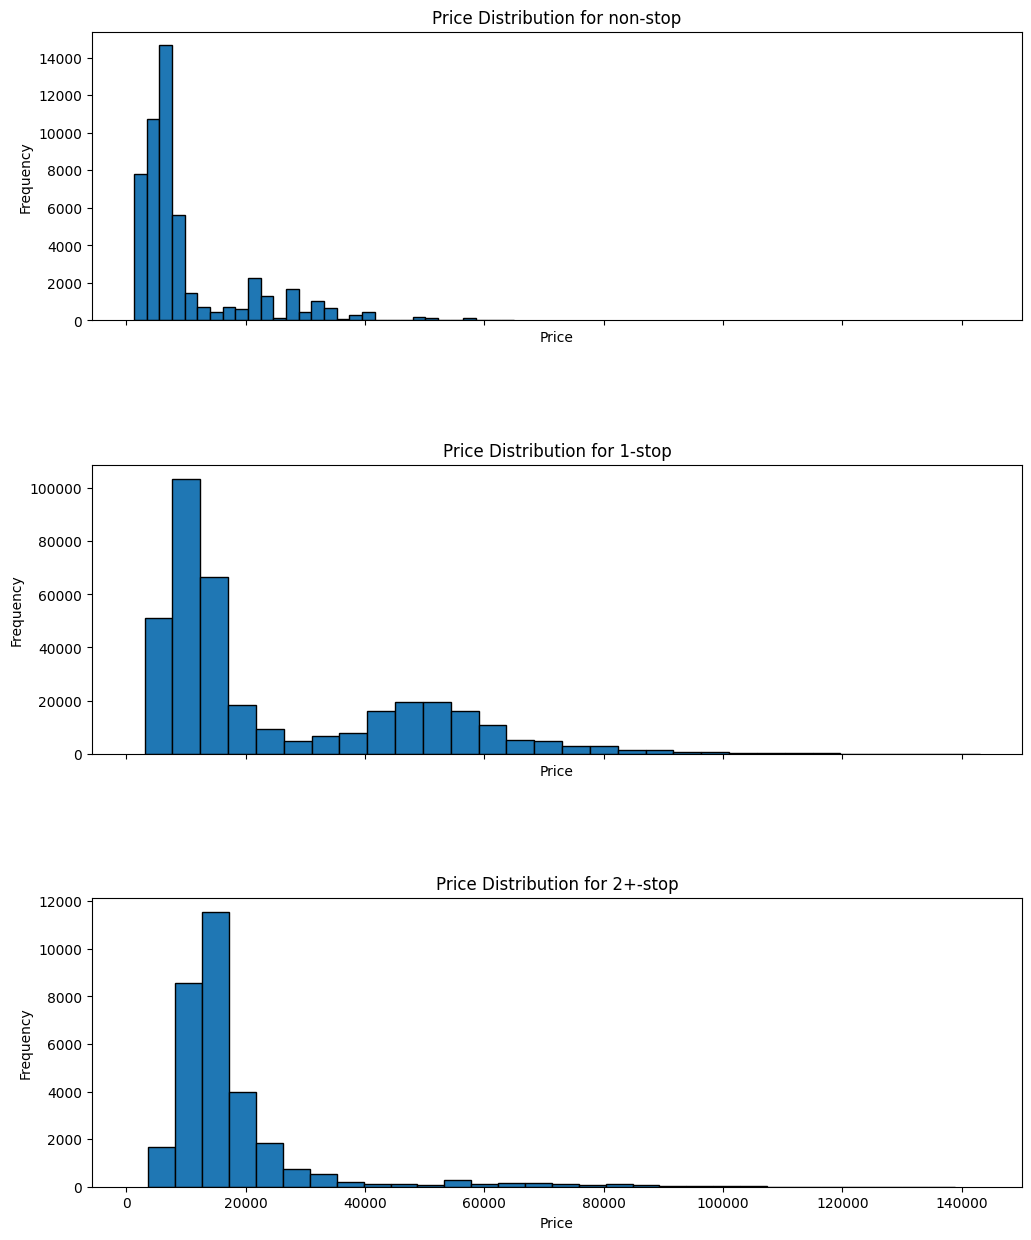

In [16]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data' and has 'stoppages' and 'price' columns

stoppage_categories = data['Total_stops'].unique()
num_categories = len(stoppage_categories)

# Set up the subplots
fig, axes = plt.subplots(num_categories, 1, figsize=(12, 5 * num_categories), sharex=True)
fig.subplots_adjust(hspace=0.5)

# Plot histograms for each category of stoppages
for i, category in enumerate(stoppage_categories):
    ax = axes[i] if num_categories > 1 else axes
    subset = data[data['Total_stops'] == category]
    ax.hist(subset['Fare'], bins=30, edgecolor='black')
    ax.set_title(f'Price Distribution for {category}')
    ax.set_xlabel('Price')
    ax.set_ylabel('Frequency')

plt.show()


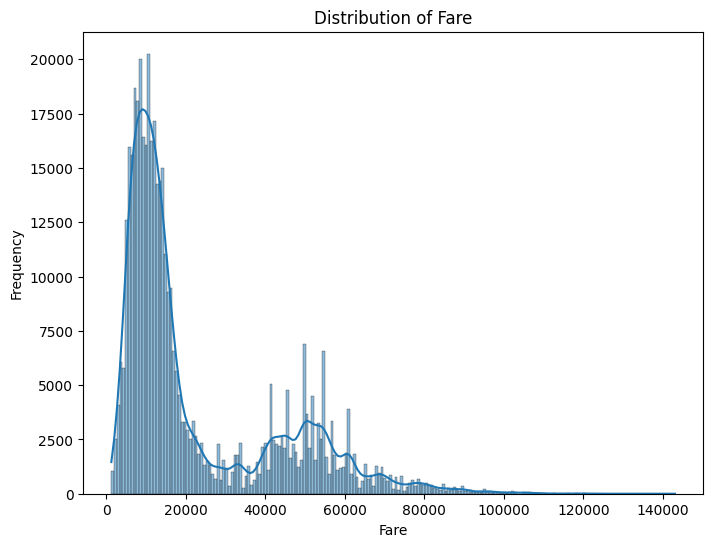

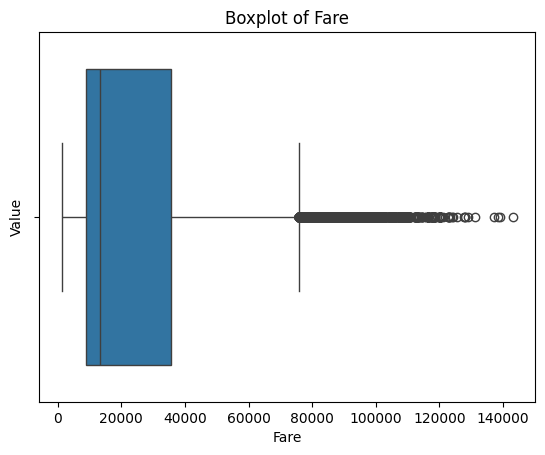

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Visualize the distribution of Fare
plt.figure(figsize=(8, 6))
sns.histplot(data['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Create a boxplot 'Fare'
sns.boxplot(data=data, x='Fare')
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.ylabel('Value')
plt.show()

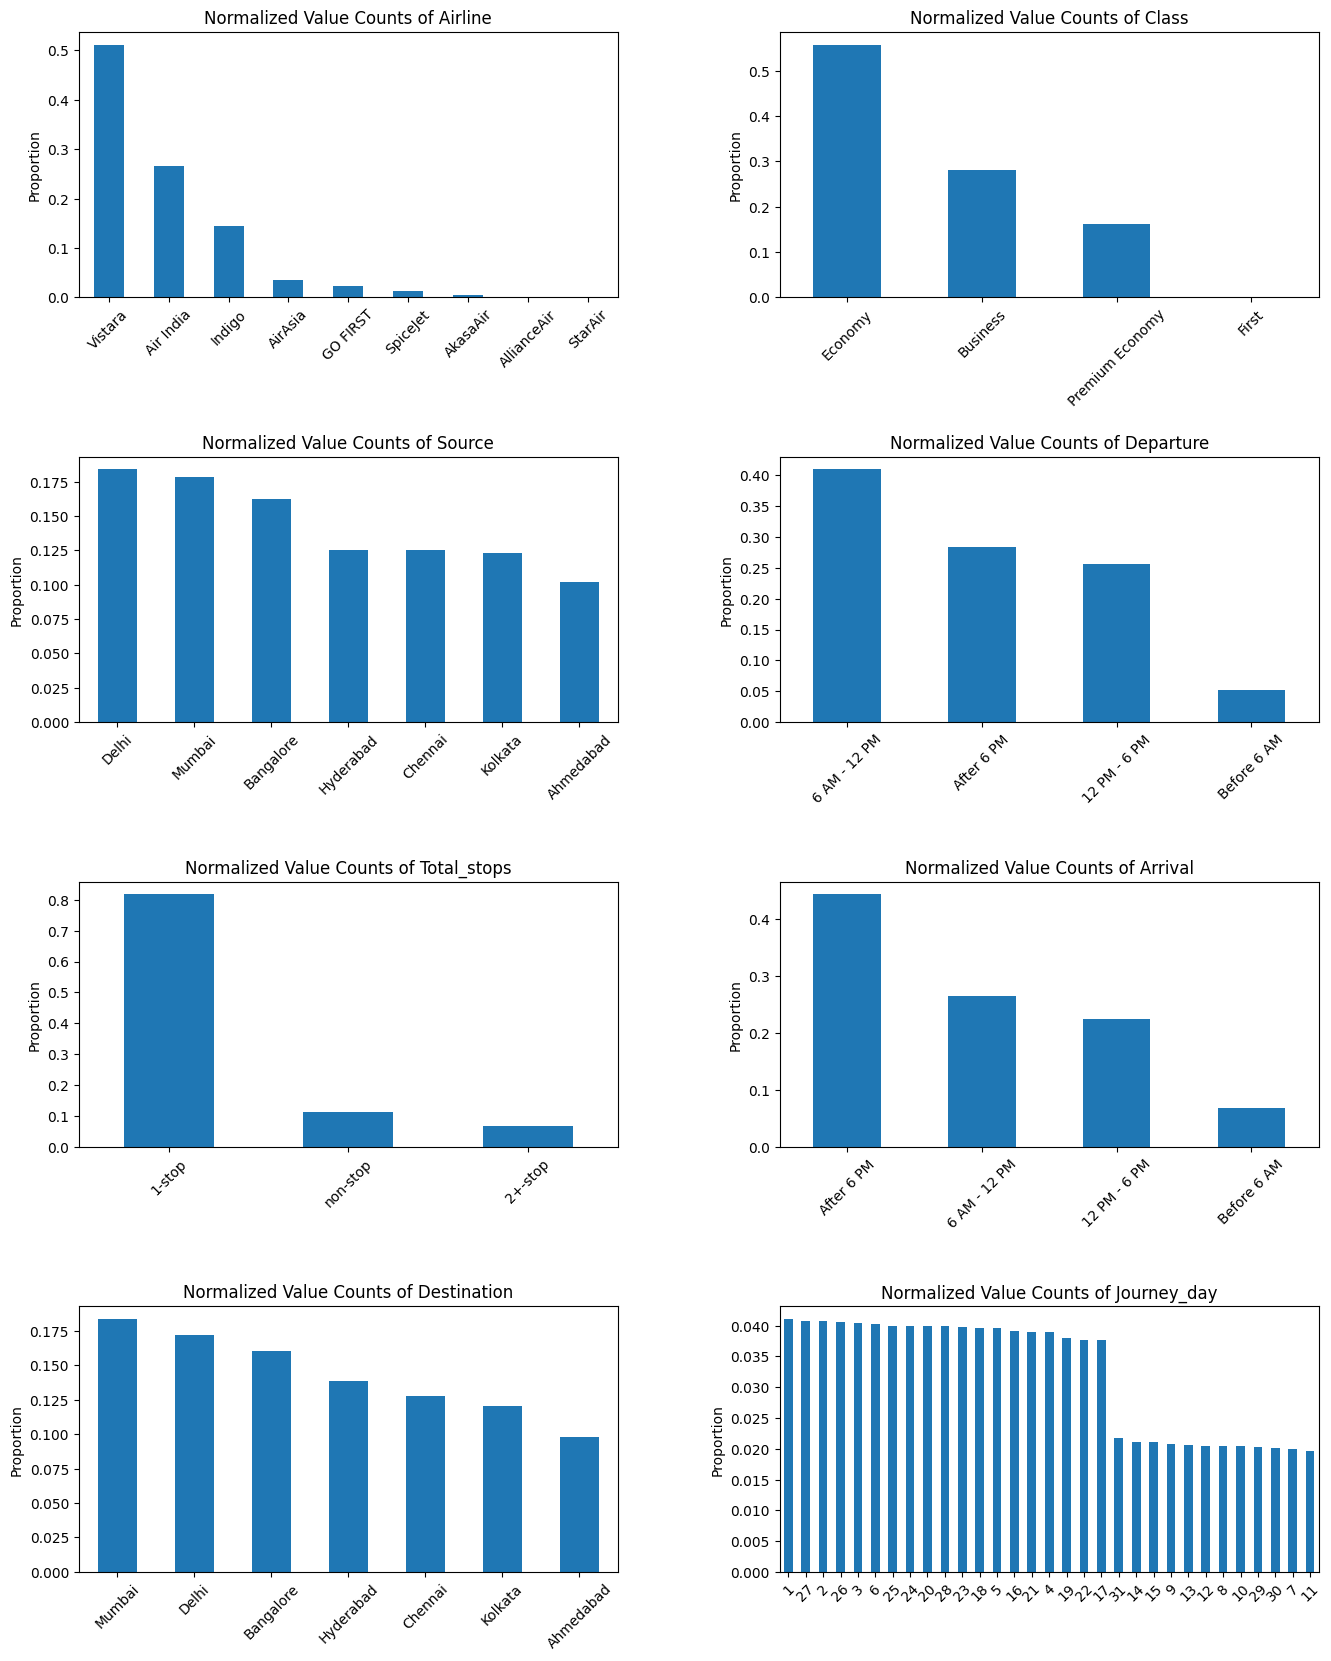

In [ ]:
# Loop through each categorical column, calculate normalized value counts, and plot bar charts

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.subplots_adjust(hspace=0.6, wspace=0.3)
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    value_counts_norm = data[col].value_counts(normalize=True)
    value_counts_norm.plot(kind='bar', ax=ax)
    ax.set_title(f'Normalized Value Counts of {col}')
    ax.set_xlabel(None)
    ax.set_ylabel('Proportion')
    ax.set_xticklabels(value_counts_norm.index, rotation=45)

plt.show()

In [ ]:
# Display the normalized value counts of 'Journey_month'
print(data['Journey_month'].value_counts(normalize=True))
# Drop the 'Journey_month' column based on the analysis
data = data.drop(columns=['Journey_month'])

Journey_month
2    0.565343
1    0.314963
3    0.119694
Name: proportion, dtype: float64


In [ ]:
# Replace rare Airline categories with 'Other'
rare_airlines = ['AkasaAir', 'AllianceAir', 'StarAir', 'SpiceJet']
data['Airline'] = data['Airline'].apply(lambda x: 'Other' if x in rare_airlines else x)

# Check the value counts after grouping
print(data['Airline'].value_counts())


Airline
Vistara      231490
Air India    119841
Indigo        65659
AirAsia       15764
GO FIRST      10786
Other          8548
Name: count, dtype: int64


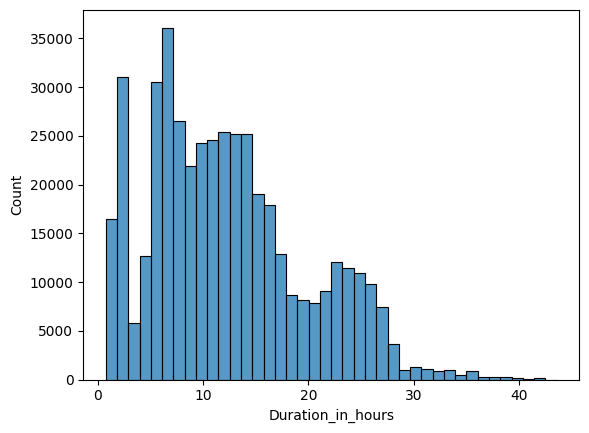

In [ ]:
# Plot a histogram and boxplot for numerical variables
sns.histplot(data['Duration_in_hours'], bins=40)
plt.show()


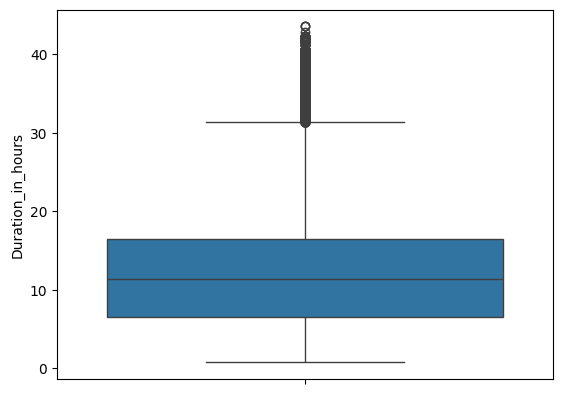

In [ ]:

sns.boxplot(data['Duration_in_hours'])
plt.show()



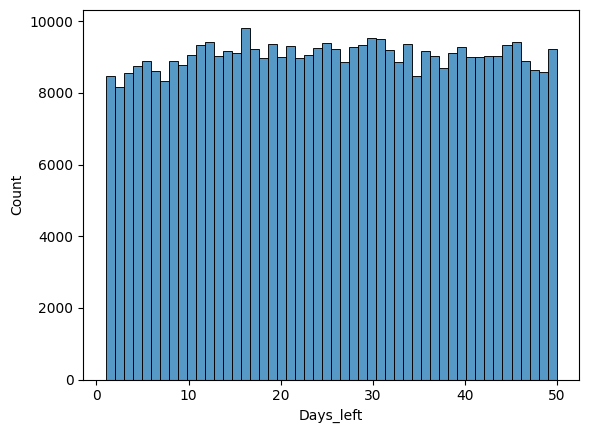

In [ ]:
sns.histplot(data['Days_left'], bins=50)
plt.show()


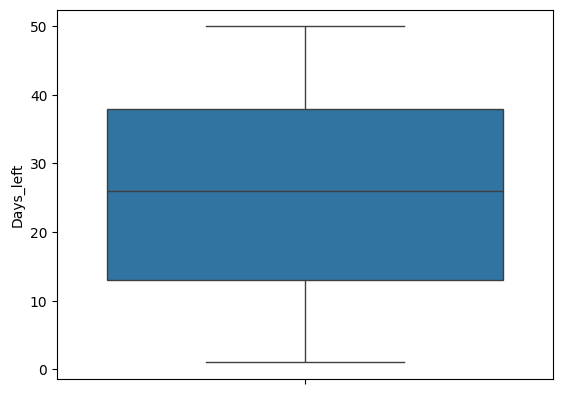

In [ ]:

sns.boxplot(data['Days_left'])
plt.show()

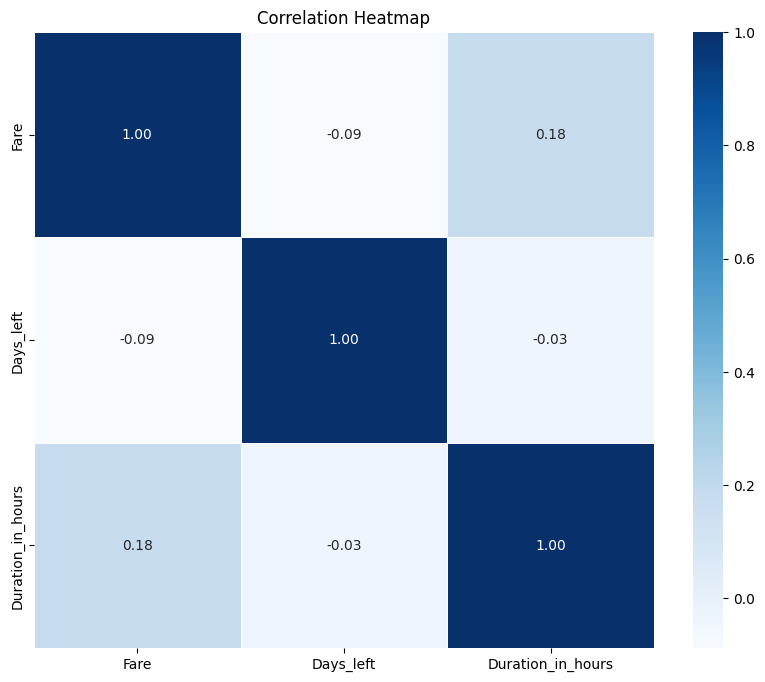

In [ ]:

# Create a heatmap to visualize the correlations of numeric variables
correlation_matrix = data[['Fare', 'Days_left','Duration_in_hours']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **FEATURE ENGEENERING**

0    False
1    False
2    False
3    False
4    False
Name: On_weekend, dtype: bool


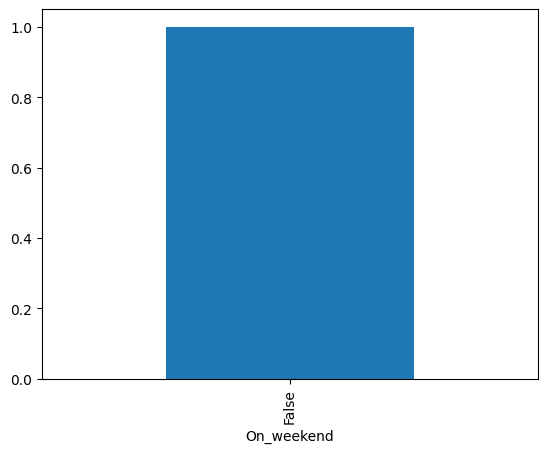

In [ ]:
# Create new column 'On_weekend'
data['On_weekend'] = False

for i, day in enumerate(data['Journey_day']):
    if day in ['Saturday', 'Sunday']:
        data.loc[i, 'On_weekend'] = True

print(data['On_weekend'].head())
data['On_weekend'].astype('category')

value_counts_weekend = data['On_weekend'].value_counts(normalize=True)
value_counts_weekend.plot(kind='bar')
plt.show()

0    False
1    False
2    False
3    False
4    False
Name: Daytime_departure, dtype: bool


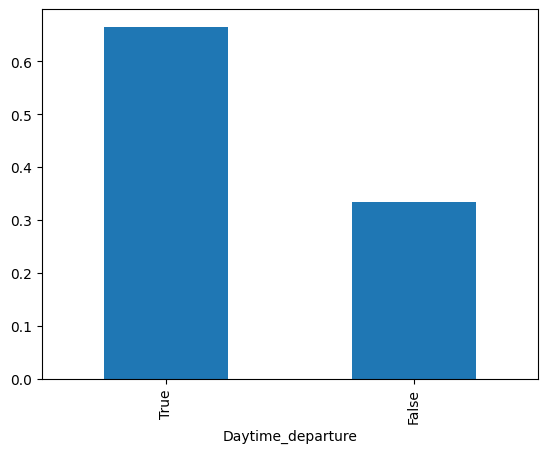

0    False
1    False
2    False
3    False
4    False
Name: Daytime_arrival, dtype: bool


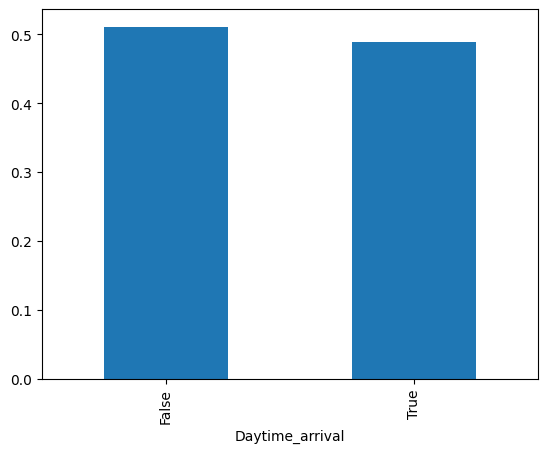

In [ ]:
# Create new columns 'Daytime_departure' and 'Daytime_arrival'
data['Daytime_departure'] = True
overnight = ['After 6 PM', 'Before 6 AM']

for i, time in enumerate(data['Departure']):
    if time in overnight:
        data.loc[i, 'Daytime_departure'] = False

print(data['Daytime_departure'].head())

value_counts_weekend = data['Daytime_departure'].value_counts(normalize=True)
value_counts_weekend.plot(kind='bar')
plt.show()

data['Daytime_arrival'] = True

for i, time in enumerate(data['Arrival']):
    if time in overnight:
        data.loc[i, 'Daytime_arrival'] = False

print(data['Daytime_arrival'].head())

value_counts_weekend = data['Daytime_arrival'].value_counts(normalize=True)
value_counts_weekend.plot(kind='bar')
plt.show()

In [ ]:
data.head()

,Journey_day,Airline,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,On_weekend,Daytime_departure,Daytime_arrival
0,16,Other,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,False,False,False
1,16,Indigo,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,False,False,False
2,16,GO FIRST,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,False,False,False
3,16,Other,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,False,False,False
4,16,Air India,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,False,False,False


In [ ]:
# Split the data into training and testing sets
X = data.drop('Fare', axis=1)
y = data['Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True,stratify=X['Airline'])

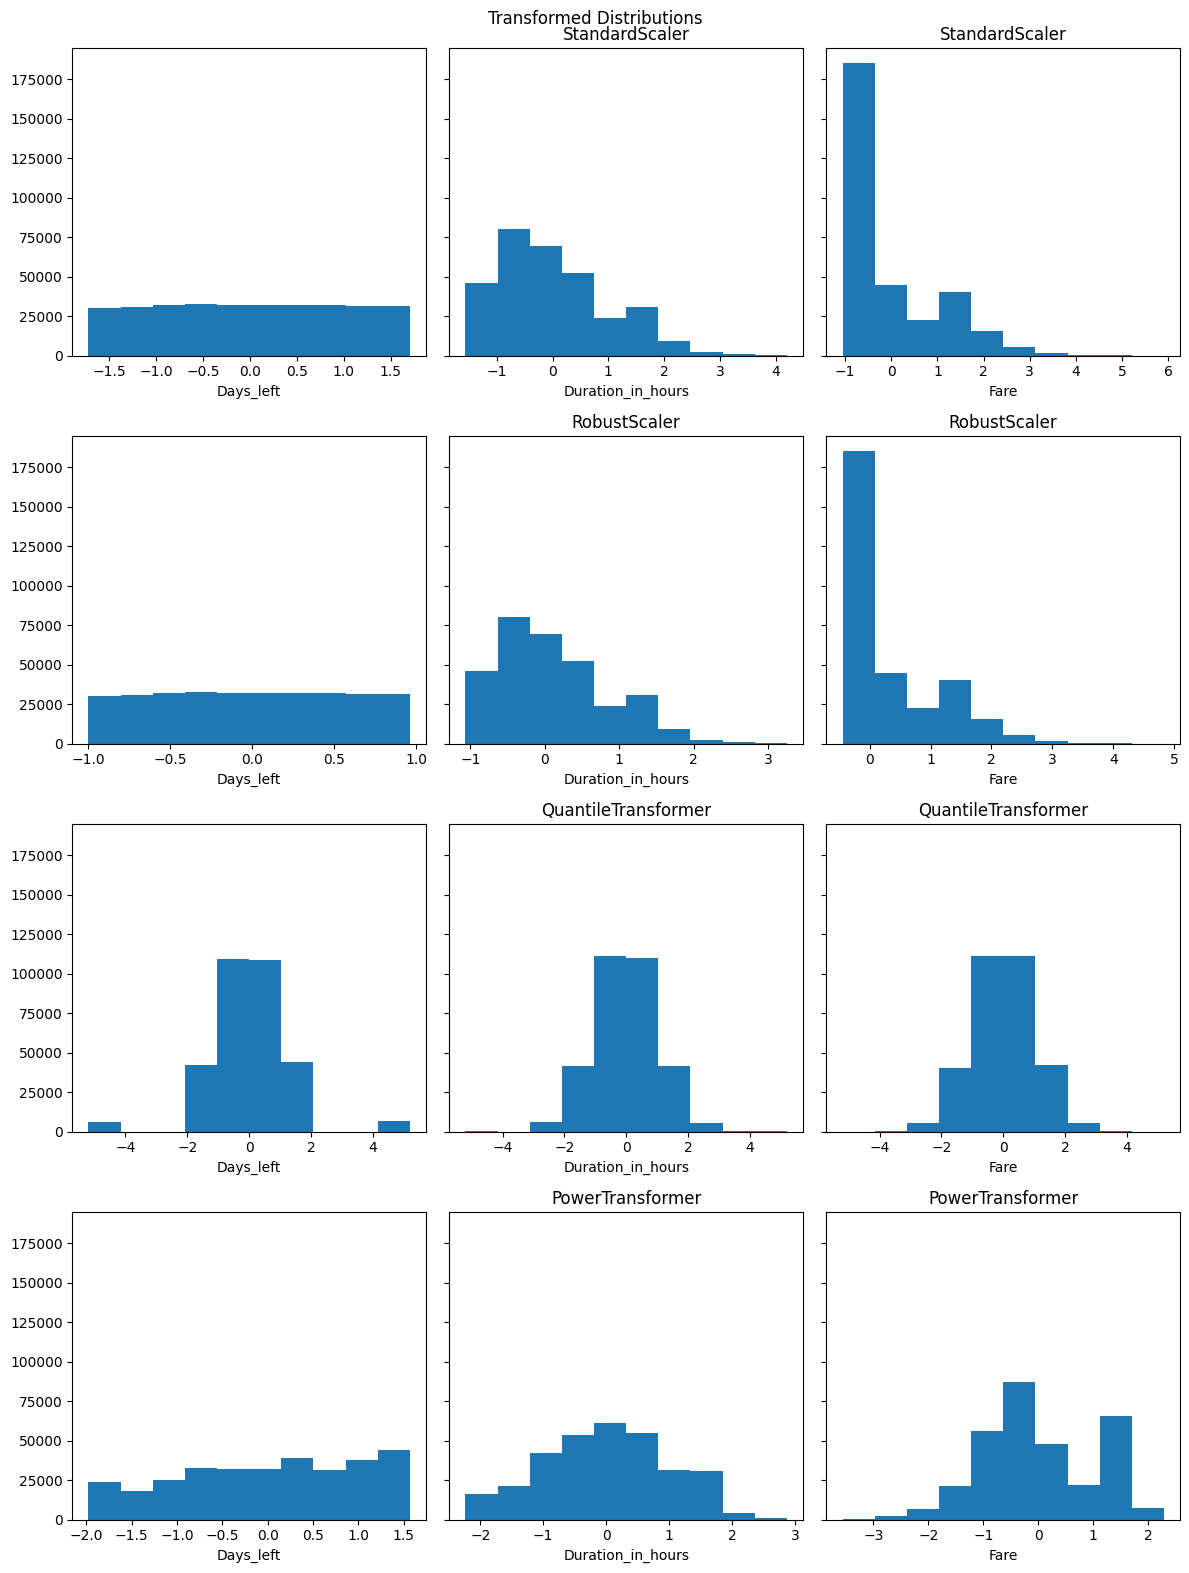

In [ ]:
from sklearn.preprocessing import StandardScaler
#Transform and plot numerical features to choose transformers for the pipeline
num_features = ['Duration_in_hours', 'Days_left']
transformers = [
    StandardScaler(),
    RobustScaler(),
    QuantileTransformer(output_distribution='normal', random_state=0),
    PowerTransformer(standardize=True)
]

fig, axs = plt.subplots(len(transformers), 3, figsize=[12, 4 * len(transformers)], sharey=True)
fig.suptitle("Transformed Distributions", fontsize=12)

for i, t in enumerate(transformers):
    transformation = t
    X_train_transformed = transformation.fit_transform(X_train[num_features])
    df_transformed = pd.DataFrame(X_train_transformed, columns=num_features)

    axs[i, 0].hist(df_transformed['Days_left'])
    axs[i, 0].set_xlabel('Days_left')

    axs[i, 1].hist(df_transformed['Duration_in_hours'])
    axs[i, 1].set_xlabel('Duration_in_hours')
    axs[i, 1].set_title(type(transformation).__name__)

    y_train_transformed = transformation.fit_transform(y_train.values.reshape(-1, 1))  # Reshape to 2D array
    df_y_transformed = pd.DataFrame(y_train_transformed, columns=['Fare'])

    axs[i, 2].hist(df_y_transformed['Fare'])
    axs[i, 2].set_xlabel('Fare')
    axs[i, 2].set_title(type(transformation).__name__)

plt.tight_layout()
plt.show()


In [ ]:
data.head()

,Journey_day,Airline,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,On_weekend,Daytime_departure,Daytime_arrival
0,16,Other,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,False,False,False
1,16,Indigo,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,False,False,False
2,16,GO FIRST,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,False,False,False
3,16,Other,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,False,False,False
4,16,Air India,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,False,False,False


In [ ]:
data  = data.drop(columns=['Departure','Arrival'])

In [ ]:
data.head()

,Journey_day,Airline,Class,Source,Total_stops,Destination,Duration_in_hours,Days_left,Fare,On_weekend,Daytime_departure,Daytime_arrival
0,16,Other,Economy,Delhi,non-stop,Mumbai,2.0833,1,5335,False,False,False
1,16,Indigo,Economy,Delhi,non-stop,Mumbai,2.3333,1,5899,False,False,False
2,16,GO FIRST,Economy,Delhi,non-stop,Mumbai,2.1667,1,5801,False,False,False
3,16,Other,Economy,Delhi,non-stop,Mumbai,2.0833,1,5794,False,False,False
4,16,Air India,Economy,Delhi,non-stop,Mumbai,2.1667,1,5955,False,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Journey_day        452088 non-null  category
 1   Airline            452088 non-null  object  
 2   Class              452088 non-null  category
 3   Source             452088 non-null  category
 4   Total_stops        452088 non-null  category
 5   Destination        452088 non-null  category
 6   Duration_in_hours  452088 non-null  float64 
 7   Days_left          452088 non-null  int64   
 8   Fare               452088 non-null  int64   
 9   On_weekend         452088 non-null  bool    
 10  Daytime_departure  452088 non-null  bool    
 11  Daytime_arrival    452088 non-null  bool    
dtypes: bool(3), category(5), float64(1), int64(2), object(1)
memory usage: 17.2+ MB


In [ ]:
data['Airline'].unique()

array(['Other', 'Indigo', 'GO FIRST', 'Air India', 'AirAsia', 'Vistara'],
      dtype=object)

In [ ]:
data['Class'].unique()

['Economy', 'Premium Economy', 'Business', 'First']
Categories (4, object): ['Business', 'Economy', 'First', 'Premium Economy']

In [ ]:
data['Source'].unique()

['Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Kolkata', 'Chennai', 'Ahmedabad']
Categories (7, object): ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata',
                         'Mumbai']

In [ ]:
data['Total_stops'].unique()

['non-stop', '1-stop', '2+-stop']
Categories (3, object): ['1-stop', '2+-stop', 'non-stop']

In [ ]:
data['Destination'].unique()

['Mumbai', 'Bangalore', 'Hyderabad', 'Kolkata', 'Chennai', 'Ahmedabad', 'Delhi']
Categories (7, object): ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata',
                         'Mumbai']

In [ ]:
data.to_csv('/content/drive/MyDrive/ML/ML Problems/FLIGHT FARE PREDICTION/new_df.csv', index=False)